In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import rasterio as rs

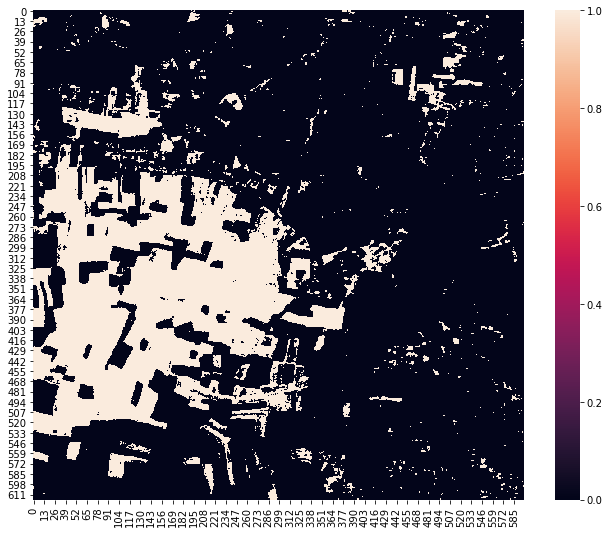

In [2]:
x = 5927
y = 1158
local_path = '../../project-monitoring/tiles/'

def load_ard_and_dates(x, y, year, local_path = local_path):
    ard_path = f'{local_path}/{str(year)}/{str(x)}/{str(y)}/ard_ndmi.npy'
    ard_dates = f'{local_path}/{str(year)}/{str(x)}/{str(y)}/ard_dates.npy'
    
    x = np.load(ard_path)
    y = np.load(ard_dates)
    y = ((year - 2017) * 365) + y
    return x, y

def temporal_filter(inp):
    # What to do in a 0 0 1 0 1 1 situation
    # Should it be    0 0 0 0 1 1
    # Or should it be 0 0 1 1 1 1
    output = np.copy(inp)
    for i in range(1, inp.shape[0] - 1):
        inpi = np.copy(inp[i])
        #ismin = inp[i] == np.min(inp[i-1:i+2])
        #ismin = ismin + np.isnan(inpi)
        ismax = inp[i] == np.max(inp[i-1:i+2])
        ismax = ismax + np.isnan(inpi)
        med = np.nanmedian(inp[i-1:i+2], axis = 0)
        inpi[ismax] = med[ismax]
        output[i] = inpi
    return output



a17, d17 = load_ard_and_dates(x, y, 2017)
a18, d18 = load_ard_and_dates(x, y, 2018)
a19, d19 = load_ard_and_dates(x, y, 2019)
a20, d20 = load_ard_and_dates(x, y, 2020)
a21, d21 = load_ard_and_dates(x, y, 2021)
a22, d22 = load_ard_and_dates(x, y, 2022)


f17 = rs.open(f'/Volumes/Johns Drive/tof-output-2017/{str(x)}/{str(y)}/{str(x)}X{str(y)}Y_FINAL.tif').read(1).astype(np.float32)[np.newaxis]
f18 = rs.open(f'/Volumes/Johns Drive/tof-output-2018/{str(x)}/{str(y)}/{str(x)}X{str(y)}Y_FINAL.tif').read(1).astype(np.float32)[np.newaxis]
f19 = rs.open(f'/Volumes/Johns Drive/tof-output-2019/{str(x)}/{str(y)}/{str(x)}X{str(y)}Y_FINAL.tif').read(1).astype(np.float32)[np.newaxis]
f20 = rs.open(f'/Volumes/Johns Drive/tof-output/{str(x)}/{str(y)}/{str(x)}X{str(y)}Y_FINAL.tif').read(1).astype(np.float32)[np.newaxis]
f21 = rs.open(f'/Volumes/Johns Drive/tof-output-2021/{str(x)}/{str(y)}/{str(x)}X{str(y)}Y_FINAL.tif').read(1).astype(np.float32)[np.newaxis]
f22 = rs.open(f'/Volumes/Johns Drive/tof-output-2022/{str(x)}/{str(y)}/{str(x)}X{str(y)}Y_FINAL.tif').read(1).astype(np.float32)[np.newaxis]

changemap = rs.open(f"change/{str(x)}X{str(y)}Y_CHANGE.tif").read(1)

fs = np.concatenate([f17, f18, f19, f20, f21, f22], axis = 0) # , f22
fs = np.float32(fs)

stable = np.sum(fs > 30, axis = 0) == 6
notree = np.sum(fs < 30, axis = 0) == 6
fs = temporal_filter(fs)
plt.figure(figsize=(11,9))
sns.heatmap((stable))
# These are the pixels that were trees in all 6 yearas

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

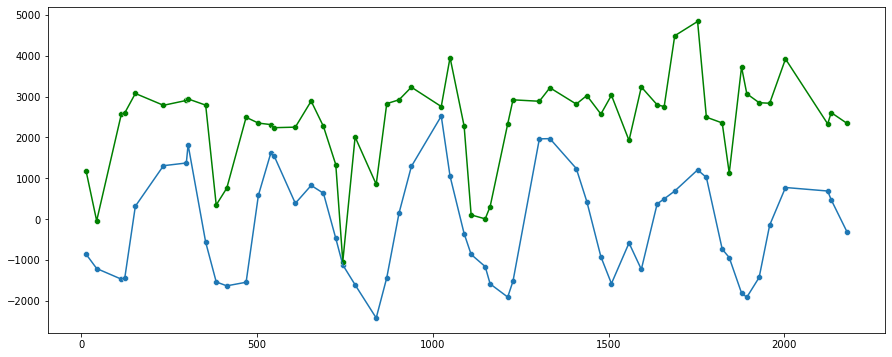

In [3]:
ard = np.concatenate([a17, a18, a19, a20, a21, a22])#, a21, a22])#, a21, a22])#,
dates = np.concatenate([d17, d18, d19, d20, d21, d22])#, d21, d22])#, d21, d22])


plt.figure(figsize=(15,6))
sns.scatterplot(dates, np.median(ard[:, notree], axis = (1)), )
sns.lineplot(dates, np.median(ard[:, notree], axis = (1)), )
sns.scatterplot(dates, np.median(ard[:, stable], axis = (1)), color = 'green')
sns.lineplot(dates, np.median(ard[:, stable], axis = (1)), color = 'green')
# This is the per-image NDMI across the entire image (in blue)
# and the per-image NDMI for stable trees (in green)

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

[Text(0, 0.5, 'Normalized difference moisture index')]

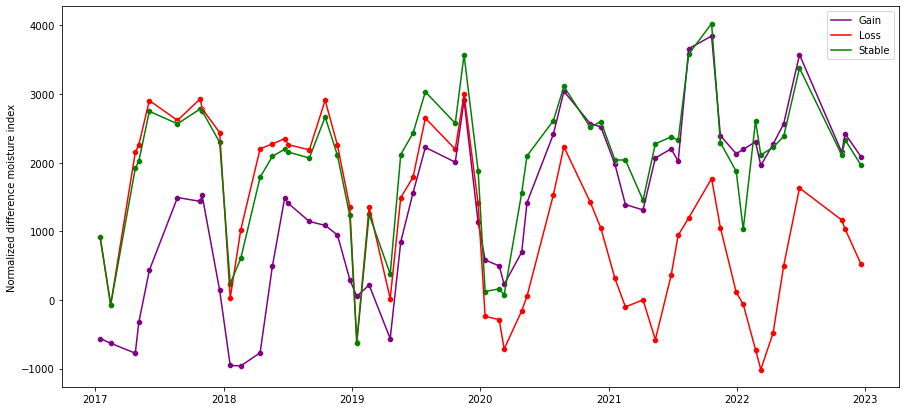

In [4]:
gain = changemap == 250
mean_gain = np.mean(ard[:, gain], axis = (1))
mean_loss = np.mean(ard[:, changemap == 150], axis = (1))
mean_nochange_tree = np.mean(ard[:, np.logical_and(changemap <= 100, changemap > 20)], axis = (1))
mean_notree = np.mean(ard[:, changemap <= 20], axis = (1))


plt.figure(figsize=(15,7))
g = sns.scatterplot((dates / 365) + 2017, mean_gain, color = 'purple')
g = sns.lineplot((dates / 365) + 2017, mean_gain, color = 'purple', label = 'Gain')
g = sns.scatterplot((dates / 365) + 2017, mean_loss, color = 'red')
g = sns.lineplot((dates / 365) + 2017, mean_loss, color = 'red', label = 'Loss')
g = sns.scatterplot((dates / 365) + 2017, mean_nochange_tree, color = 'green')
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable')
g.set(ylabel = 'Normalized difference moisture index')
#sns.scatterplot(dates, mean_notree, color = 'gray')
#sns.lineplot(dates, mean_notree, color = 'gray')

In [5]:
from scipy.stats import gaussian_kde
from scipy.special import ndtr

d = ard[:, stable]
d = d.swapaxes(0, 1)
# Sample up to 10% of the image (600 * 600) of the stable pixels
dsamp = np.random.randint(0, d.shape[0], np.minimum(20000, d.shape[0]))
d = d[dsamp]
print(d.shape)

# And calculate the per-image 5th percentile CDF NDMI
def make_and_analyze_kde_for_one_img(ard, step, ref):
    kde = gaussian_kde(ref[:, step])
    reg_grid = np.arange(-10000, 10000, 10)
    cdf = tuple(ndtr(np.ravel(item - kde.dataset) / kde.factor).mean()
            for item in reg_grid)
    cdf_5_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.05))]
    cdf_10_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.10))]
    cdf_25_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.25))]
    cdf_50_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.50))]
    f = ard[step] >= cdf_5_percentile
    m = ard[step] >= cdf_10_percentile
    b = ard[step] >= cdf_25_percentile
    h = ard[step] >= cdf_50_percentile
    return f, m, b, h

kde = np.zeros_like(ard)
kde10 = np.zeros_like(ard)
kde50 = np.zeros_like(ard)
kde_expected = np.zeros_like(ard)
for i in range(ard.shape[0]):
    kde[i], kde10[i], kde_expected[i], kde50[i] = make_and_analyze_kde_for_one_img(ard, i, d)    
    
    


(20000, 56)


In [6]:
def make_and_analyze_anomaly_prob_per_img(ard, step, ref):
    kde = gaussian_kde(ref[:, step])
    reg_grid = np.arange(-10000, 10000, 10)
    cdf = tuple(ndtr(np.ravel(item - kde.dataset) / kde.factor).mean()
            for item in reg_grid)
    
    output = np.zeros_like(ard[step], dtype = np.float32)
    for i in range(0, 100, 5):
        fraction = i / 100
        cdf_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - fraction))]
        is_greater = ard[step] >= cdf_percentile
        output[is_greater] = fraction
    return output

percentiles = np.zeros_like(ard, dtype = np.float32)
for i in range(ard.shape[0]):
    percentiles[i] = make_and_analyze_anomaly_prob_per_img(ard, i, d)  

In [7]:
print(f"Upper percentile, no tree: {np.percentile(percentiles[:, notree], 90)}")

Upper percentile, no tree: 0.20000000298023224


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

[Text(0, 0.5, 'Anomaly probility')]

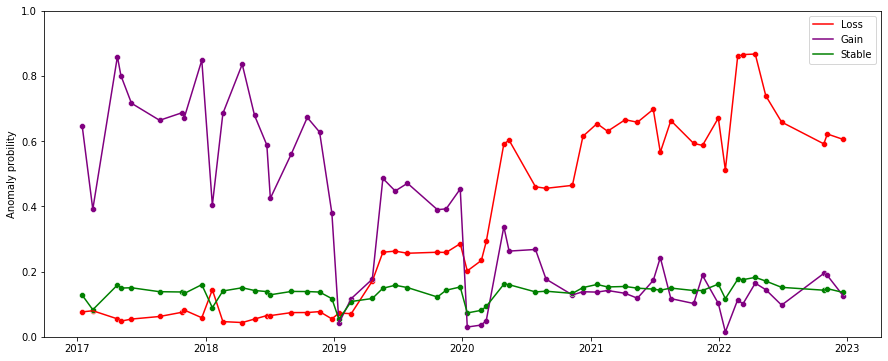

In [8]:
gain = changemap == 250
mean_gain = np.mean(kde[:, gain], axis = (1))
mean_loss = np.mean(kde[:, changemap == 150], axis = (1))
mean_nochange_tree = np.mean(kde[:, np.logical_and(changemap <= 100, changemap > 20)], axis = (1))
mean_notree = np.mean(kde[:, changemap <= 20], axis = (1))


plt.figure(figsize=(15,6))
sns.scatterplot((dates / 365) + 2017, 1 - mean_loss, color = 'red')
sns.lineplot((dates / 365) + 2017, 1 - mean_loss, color = 'red', label = 'Loss')
sns.scatterplot((dates / 365) + 2017, 1 - mean_gain, color = 'purple')
sns.lineplot((dates / 365) + 2017, 1 - mean_gain, color = 'purple', label = 'Gain')
g = sns.scatterplot((dates / 365) + 2017, 1 - mean_nochange_tree, color = 'green')
g = sns.lineplot((dates / 365) + 2017, 1 - mean_nochange_tree, color = 'green', label = 'Stable')
g.set(ylim=(0, 1))
g.set(ylabel = 'Anomaly probility')

2018 0
2019 1
2020 2
2021 3
2022 4


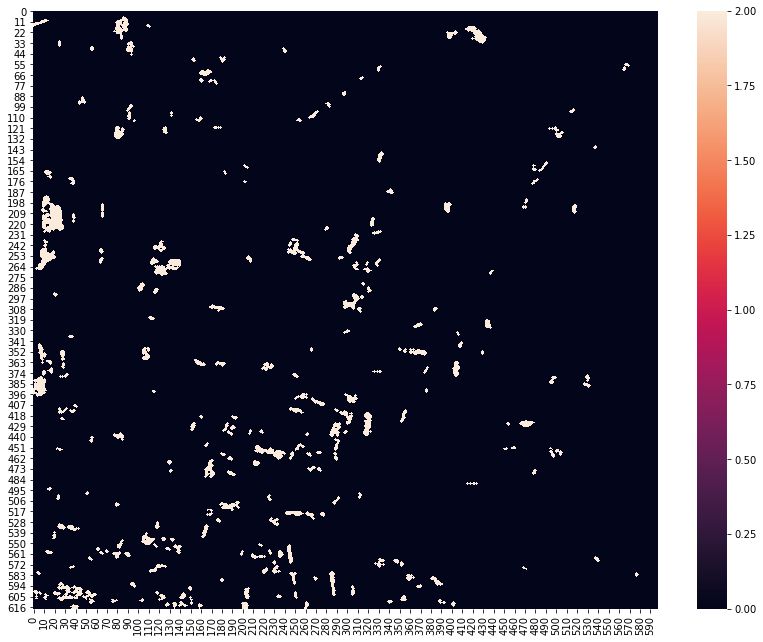

In [9]:
from numpy.lib.stride_tricks import sliding_window_view
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from scipy import ndimage

def remove_noise(arr, thresh = 15):
    
    Zlabeled,Nlabels = ndimage.measurements.label(arr)
    label_size = [(Zlabeled == label).sum() for label in range(Nlabels + 1)]
    for label,size in enumerate(label_size):
        if size < thresh:
            arr[Zlabeled == label] = 0
    return arr

def identify_anomaly_events(inp, n, shape):
    inp_ = inp == n
    #sums = np.convolve(inp_, np.ones((3, 3, 3), int),'valid')
    
    sums = np.sum(sliding_window_view(inp_, window_shape = (shape, 1, 1)), axis = 3).squeeze()

    sums = np.concatenate([np.zeros_like(sums[0])[np.newaxis],
                           sums,
                           np.zeros_like(sums[0])[np.newaxis]], axis = 0)
    return sums


def identify_gain_in_year(kde, year):
    # GGain is:
    #  - A negative anomaly in two-year window
    #  - A positive anomaly in the next 2 year window
    # THIS SEEMS TO BE THE BEST PERFORMING FOR NOW.
    # TEST OBJECT BASED ADDITIONS TO THIS FIRST
    
    if year > 2018:
        negative_anomaly_after = identify_anomaly_events(kde, 0, 3) == 3
        negative_anomaly_prior = identify_anomaly_events(kde10, 0, 3) == 3
    if year == 2018:
        negative_anomaly_prior = identify_anomaly_events(kde10, 0, 3) == 3
        negative_anomaly_after = negative_anomaly_prior
        
    positive_anomaly = identify_anomaly_events(kde_expected, 1, 2) == 2
    
    dates_ = dates#[1:-1] # since 3 window sum for identfy_anomaly
    
    img_prior3_start = np.sum(dates_ <= ((year - 2017 - 3) * 365 ))
    img_prior2_start = np.sum(dates_ <= ((year - 2017 - 2) * 365 ))
    img_prior_start = np.sum(dates_ <= ((year - 2017 - 1) * 365 ))
    img_current_start = np.sum(dates_ <= ((year - 2017) * 365 ))
    img_next_start = np.sum(dates_ <= ((year - 2017 + 1) * 365 ))
    img_next_end = np.sum(dates_ <= ((year - 2017 + 2) * 365 ))
    img_next2_end = np.sum(dates_ <= ((year - 2017 + 3) * 365 ))
    #if year == 2022:
    #    img_next_start = img_current_start
    if year == 2017:
        img_current_start = img_next_start
        #img_next_end = img_next2_end
    
    # Loss event in Y-2, Y-1 or in Y0
    negative_prior = np.sum(negative_anomaly_prior[img_prior2_start:img_next_start], axis = 0) > 0
    
    # Tree event in Y + 1
    positive_after = np.sum(positive_anomaly[img_current_start:img_next2_end], axis = 0) > 0

    
    # No loss event in Y + 1
    negative_after = np.sum(negative_anomaly_after[img_next_start:img_next_end], axis = 0) > 0
    
    candidate_gain = (negative_prior) * (positive_after) * (1 - negative_after)# * (negative_prior)
    #mean_before = np.mean(percentiles[img_prior_start:img_current_start], axis = 0)
    #mean_prior = np.mean(percentiles[img_prior2_start:img_prior_start], axis = 0)
    #mean_current = np.mean(percentiles[img_current_start:img_next_start], axis = 0)
    #mean_after = np.mean(percentiles[img_next_start:img_next_end], axis = 0)
    #means = (np.maximum(mean_current, mean_after) - np.minimum(mean_before, mean_prior)) > 0.0
    candidate_gain = candidate_gain# * means
    
    struct = ndimage.generate_binary_structure(2, 1)
    candidate_gain = binary_dilation(1 - (binary_dilation(1 - candidate_gain)))
    candidate_gain = remove_noise(candidate_gain, 10)
    return candidate_gain


def identify_loss_in_year(kde, year):
    # A loss is defined as: 
    # - A medium confidence tree sometime in the last 2 years (90% confident)
    # - No high confidence tree in the next year (50% confident)
    # - Negative anomaly in Y0 or Y-1, or Y+1 
    # Note that the (the negative anomaly may show up after TTC identifies the loss, as
    # the anomaly needs consistency between many images)
    
    positive_anomaly = identify_anomaly_events(kde_expected, 1, 3) == 3
    positive_anomaly17 = identify_anomaly_events(kde10, 1, 3) == 3
    negative_anomaly = identify_anomaly_events(kde, 0, 3) == 3
    dates_ = dates[1:-1] # since 3 window sum for identfy_anomaly
    
    img_2prior_start = np.sum(dates_ <= ((year - 2017 - 2) * 365 ))
    img_prior_start = np.sum(dates_ <= ((year - 2017 - 1) * 365 ))
    img_current_start = np.sum(dates_ <= ((year - 2017) * 365 ))
    img_next_start = np.sum(dates_ <= ((year - 2017 + 1) * 365 ))
    img_next_end = np.sum(dates_ <= ((year - 2017 + 2) * 365 ))
    img_next2_end = np.sum(dates_ <= ((year - 2017 + 3) * 365 ))

    if year == 2017:
        positive_anomaly = positive_anomaly17
    
    # Medium confidence tree sometime in last 2 years (10%)
    positive_prior = np.sum(positive_anomaly[img_2prior_start:img_next_start], axis = 0) > 0

    # No High confidence tree in the next year (50%)
    #positive_after = np.sum(positive_anomaly_after[img_next_start:img_next_end], axis = 0) > 0
    
    # Negative anomaly In this year, year before, or year after
    negative_after = np.sum(negative_anomaly[img_prior_start:img_next2_end], axis = 0) > 0
    candidate_loss =  positive_prior * negative_after #* positive_prior #(1 - positive_after)
    struct = ndimage.generate_binary_structure(2, 1)
    
    candidate_loss = 1 - (binary_dilation(1 - candidate_loss))
    #candidate_loss = remove_noise(candidate_loss, )
    return candidate_loss

gain = np.zeros((5, ard.shape[1], ard.shape[2]))
loss = np.zeros((5, ard.shape[1], ard.shape[2]))


for i in range(5):#range(gain.shape[0]):
    print(2017 + i + 1, i)
    gain[i] = identify_gain_in_year(kde, 2017 + i + 1) * (i + 2)
    loss[i] = identify_loss_in_year(kde, 2017 + i + 1) * (i + 2)
    #, l = x[0], x[1]
plt.figure(figsize=(14,11))
sns.heatmap(gain[0])

In [10]:
def remove_nonoverlapping_events(candidate, anomaly, thresh = 2):
    candidate_labels, n = ndimage.measurements.label(candidate)
    for i in range(n):
        candidate_i = candidate_labels == i
        if np.sum(anomaly[candidate_i]) < (np.sum(candidate_i) / thresh):
            candidate[candidate_i] = 0.
    return candidate

def prop_overlapping_events(before, current, thresh):
    candidate_labels, n = ndimage.measurements.label(before)
    for i in range(1, n):
        before_i = before == i
        if np.sum(current[before_i]) > (np.sum(before_i > 0) / thresh):
            current[before_i] = 1.
    return current

def identify_gain_in_year_probability(prior, year):
    # Gain is:
    #  Loss event sometime in prior 2 years
    # < 0.25 mean sometime in last than 2 years
    # > 0.2 change sometime in the 4 years
    # at least 2 > reference images in the next year
    
    img_prior3_start = np.sum(dates <= ((year - 2017 - 3) * 365 ))
    img_prior2_start = np.sum(dates <= ((year - 2017 - 2) * 365 ))
    img_prior_start = np.sum(dates <= ((year - 2017 - 1) * 365 ))
    img_current_start = np.sum(dates <= ((year - 2017) * 365 ))
    img_current_mid = np.sum(dates <= ((year - 2017 + 0.5) * 365 ))
    img_next_start = np.sum(dates <= ((year - 2017 + 1) * 365 ))
    img_current_end = img_next_start
    img_next_end = np.sum(dates <= ((year - 2017 + 2) * 365 ))
    img_next2_end = np.sum(dates <= ((year - 2017 + 3) * 365 ))
    img_prior2_end = img_prior_start
    if year == 2022:
        img_next_start = img_current_start
    if year == 2018:
        #img_prior_start = img_current_start
        #img_current_start = img_next_start
        img_prior2_end = img_next_start
        print(img_current_start, img_current_end)
    print(percentiles[img_prior2_start:img_prior_start].shape)
    prior2 = np.percentile(percentiles[img_prior2_start:img_prior2_end], 75, axis = 0)
    prior = np.percentile(percentiles[img_prior_start:img_current_start], 75, axis = 0)
    after = np.percentile(percentiles[img_current_end:img_next_end], 25, axis = 0)
    currentafter = np.mean(percentiles[img_current_start:img_next_end],axis = 0)
    current = np.percentile(percentiles[img_current_start:img_current_end], 25, axis = 0)
    
    print(f'Year: {year} \n'
            f'Prior 2 start {img_prior2_start} \n'
            f'Prior start {img_prior_start} \n'
            f'Current start {img_current_start} \n', 
            f'Current end {img_current_end} \n',
            f'Next start {img_next_start} \n', )
    #prior[prior2 < prior] = prior2[prio]
    option1 = (np.maximum(after, current) - prior) > 0.05
    option2 = (current - np.minimum(prior, prior2)) > 0.05
    #candidate_gain = (np.maximum(after, current) - (np.minimum(prior, prior2))) > 0.25
    candidate_gain = np.logical_or(option1, option2)
    
    prior_flag = np.ones_like(kde[0])
    after_flag = np.ones_like(kde[0])
    
    #if year > 2017:
    #    candidate_gain = prop_overlapping_events(prior, candidate_gain, 10)
    # Previous 2 years needs at least 3 no-tree pixels
    if year > 2017:
        n_prior_less_than_33 = np.sum(percentiles[img_prior2_start:img_current_mid] <= 0.05, axis = 0)
        #prior_flag = np.logical_or(prior < 0.3, prior2 < 0.3)
        prior_flag = n_prior_less_than_33 >= 3

    if year < 2022:
        loss_after = np.sum(percentiles[img_current_mid:img_next_end] < 0.05, axis = 0) < 3
        #after_flag = np.sum(percentiles[img_current_start:img_next_end] > 0.45, axis = 0) >= 3
        #after_flag = currentafter > 0.45
        mean_after = np.mean(percentiles[img_current_end:img_next_end], axis = 0) > 0.25
        mean_current = np.mean(percentiles[img_current_start:img_current_end], axis = 0) > 0.25
        means = np.maximum(mean_after, mean_current)
        after_flag = np.logical_and(after_flag, loss_after)
        after_flag = after_flag * means
        
    
    candidate_gain = candidate_gain * prior_flag * after_flag

    
    candidate_gain = candidate_gain * means
    candidate_gain = remove_noise(candidate_gain, 10)

In [11]:

# And calculate the per-image 5th percentile CDF NDMI
def make_and_analyze_kde_for_one_img(ard, step, ref):
    kde = gaussian_kde(ref[:, step])
    reg_grid = np.arange(-10000, 10000, 10)
    cdf = tuple(ndtr(np.ravel(item - kde.dataset) / kde.factor).mean()
            for item in reg_grid)
    cdf_5_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.05))]
    cdf_10_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.10))]
    cdf_25_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.25))]
    cdf_50_percentile = np.array(reg_grid)[np.argmin(abs(np.array(cdf) - 0.50))]
    f = ard[step] >= cdf_5_percentile
    m = ard[step] >= cdf_10_percentile
    b = ard[step] >= cdf_25_percentile
    h = ard[step] >= cdf_50_percentile
    return f, m, b, h


def identify_gain_in_year_probability_new(prior, year):
    # Gain is:
    #  Loss event sometime in prior 2 years
    # < 0.25 mean sometime in last than 2 years
    # > 0.2 change sometime in the 4 years
    # at least 2 > reference images in the next year
    """
    mins = (year - 2017 - 1)
    maxs = (year - 2017 + 2)
    stable = np.sum(ff[mins:maxs] > 40, axis = 0) == (maxs - mins)
    d = ard[:, stable]
    d = d.swapaxes(0, 1)
    ## Sample up to 10% of the image (600 * 600) of the stable pixels
    dsamp = np.random.randint(0, d.shape[0], np.minimum(10000, d.shape[0]))
    d = d[dsamp]

    kde = np.zeros_like(ard)
    kde10 = np.zeros_like(ard)
    kde50 = np.zeros_like(ard)
    kde_expected = np.zeros_like(ard)
    for i in range(ard.shape[0]):
        kde[i], kde10[i], kde_expected[i], kde50[i] = make_and_analyze_kde_for_one_img(ard, i, d)    
    """
    gain = np.zeros_like(percentiles[0])
    start_img = np.sum(dates <= ((year - 2017) * 365 ))
    end_img = np.sum(dates <= ((year + 1 - 2017) * 365 ))
    print(start_img, end_img)
    
    negative_anomaly = identify_anomaly_events(kde, 0, 3) == 3
    positive_anomaly = identify_anomaly_events(kde_expected, 1, 3) == 3
    negative_anomaly_after = identify_anomaly_events(kde, 0, 3) == 3
    positive_anomaly_before = identify_anomaly_events(kde_expected, 1, 3) == 3
    
    for i in range(start_img, end_img):
        image_date = dates[i]
        
        prior_twoyears = np.sum(dates <= (image_date - 720))
        prior_year = np.sum(dates <= (image_date - 365))
        prior_year6mo = np.sum(dates <= (image_date - 180))
        current_year6mo = np.sum(dates <= (image_date + 180))
        current_year = np.sum(dates <= (image_date))
        #current_year_end = np.sum(dates <= (image_date + 365))
        next_year = np.sum(dates <= (image_date + 365))
        next_yearandhalf = np.sum(dates <= (image_date + 365 + 365))
        print(f'{i}: {image_date}, previous: {prior_twoyears}-{i}, current: {current_year}, next: {next_year}')
        
        loss_before = np.sum(negative_anomaly[prior_year:current_year], axis = 0) > 0
        notree_before = np.sum(positive_anomaly[prior_year6mo:current_year], axis = 0) == 0
        noloss_after = np.sum(negative_anomaly_after[current_year:next_year], axis =0) == 0
        tree_after = np.sum(positive_anomaly_before[current_year:next_yearandhalf], axis = 0) >= 1
        gain_i = loss_before * noloss_after #* notree_before* tree_after
        
        mean_after = np.median(percentiles[next_year:next_yearandhalf], axis = 0)
        mean_before = np.median(percentiles[prior_year:current_year], axis = 0)
        mean_current = np.mean(percentiles[current_year:next_year], axis = 0)
        means = np.maximum(mean_after, mean_current)
        
        gain_i = gain_i * ((mean_current - mean_before) > 0.05)# * (means > 0.25)
        gain[gain == 0] = gain_i[gain == 0]
        
    if year > 2017:
        gain = prop_overlapping_events(prior, gain, 2)
    
    gain = remove_noise(gain, 10)

    return gain

In [12]:
def identify_outliers(inp):
    inp_ = inp == 0
    m = np.diff(np.where(np.concatenate(([inp_[0]],
                                         inp_[:-1] != inp_[1:],
                                         [True])))[0])[::2]
    return np.max(m) if m.shape[0] > 0 else 0


def identify_outliers_before_after_year(kde, year, stable):
    begin_img = np.sum(dates <= ((year - 2017 - 2) * 365 ))
    
    mid_img = np.sum(dates <= ((year - 2017) * 365 ))
    mid_img2 = np.sum(dates <= ((year - 2017 + 1) * 365 ))
    if year == 2022:
        mid_img2 = mid_img
    end_img = np.sum(dates <= (((year + 3) - 2017) * 365 ))
    
    # MID IMG OR MIDIMG 2
    
    kde = np.reshape(kde, (ard.shape[0], ard.shape[1] * ard.shape[2]))
    print(year, begin_img, mid_img, end_img)
    
    # If there are at least 3 images for begin and after
    if (mid_img - begin_img > 3) and ((end_img - mid_img) > 3):
        
        notree_before = np.apply_along_axis(identify_outliers, 0, kde[begin_img:mid_img])
        notree_before = notree_before.reshape(ard.shape[1], ard.shape[2])

        notree_after = np.apply_along_axis(identify_outliers, 0, kde[mid_img2:end_img])
        notree_after = notree_after.reshape(ard.shape[1], ard.shape[2])
    
    # otherwise, just look at before/after instead of doing annual
    else:
        notree_before = np.apply_along_axis(identify_outliers, 0, kde[:mid_img])
        notree_before = notree_before.reshape(ard.shape[1], ard.shape[2])

        notree_after = np.apply_along_axis(identify_outliers, 0, kde[mid_img:])
        notree_after = notree_after.reshape(ard.shape[1], ard.shape[2])
    print(notree_before.shape, notree_after.shape)
    if year != 2022:
        # at least 4 consecutive no-tree 
        gain_year = (notree_before >= 3) * (notree_after < 3)
        loss_year = (notree_before < 3) * (notree_after >= 3)
        #structure = np.ones((2, 2))
        gain_year = binary_dilation(gain_year)
        loss_year = binary_dilation(loss_year)
    if year == 2022:
        gain_year = (notree_before > 3) * (notree_after <= 1)
        loss_year = (notree_before < 3) * (notree_after >= 3)
    if year == 2017:
        loss_year = (notree_before <= 1) * (notree_after >= 3)

    return (gain_year, loss_year, notree_before, notree_after)
        
#gain = np.zeros((4, ard.shape[1], ard.shape[2]))
#loss = np.zeros((4, ard.shape[1], ard.shape[2]))

"""
for i in range(gain.shape[0]):
    out = identify_outliers_before_after_year(kde, (2017 + i + 1), stable)# * (i + 2)
    
    gain[i] = out[0] * (i + 2)
    loss[i] = out[1] * (i + 2)
    """

'\nfor i in range(gain.shape[0]):\n    out = identify_outliers_before_after_year(kde, (2017 + i + 1), stable)# * (i + 2)\n    \n    gain[i] = out[0] * (i + 2)\n    loss[i] = out[1] * (i + 2)\n    '

## English version

Consider the year 2019.

If all images in 2017 and 2018 have at least 1 anomaly, e.g. 4 or more consecutive images with RDF < 0.05, then we say that at some point prior to 2019  there was no tree on that pixel.

For year 2019 and 2020, if there are no anomalies, e.g. 3 or less consecutive images with RDF < 0.05, then we say that in 2019 and 2020 there is a tree on that pixel.

In [13]:
fs = fs.astype(np.float32)
ff = temporal_filter(fs)


f17 = f17.squeeze().astype(np.float32)
f18 = f18.squeeze().astype(np.float32)
f19 = f19.squeeze().astype(np.float32)
f20 = f20.squeeze().astype(np.float32)
f21 = f21.squeeze().astype(np.float32)
f22 = f22.squeeze().astype(np.float32)
#out22 = identify_outliers_before_after_year(kde, (2022), stable)
gain22 = identify_gain_in_year(kde, 2022) * ((f22 - f21) >= 50) * (f21 < 30)
gain22 = remove_noise(gain22.squeeze(), thresh = 15)#  * 6

loss22 = identify_loss_in_year(kde, 2022)
candidateloss2022 = ((ff[4] - ff[5]) >= 50)* (ff[4] > 50) * (ff[3] > 50) * (ff[5] < 30)
loss22 = remove_nonoverlapping_events(candidateloss2022, loss22,5)
loss22 = remove_noise(loss22, thresh = 15)

gain18 = np.copy(gain[0]).squeeze() * ((f18 - f17).squeeze() >= 50) * (f17 < 30)
gain18 = remove_noise(gain18, thresh = 15)
gain18 = gain18.squeeze() * 1
gain18 = np.clip(gain18, 0, 1)

loss18 = identify_loss_in_year(kde, 2018)
candidateloss2018 = ((ff[0] - ff[1]).squeeze() >= 60) * (ff[0] > 60) * (ff[1] < 30)
loss18 = remove_nonoverlapping_events(candidateloss2018, loss18, 5)
#loss18 = remove_noise(loss18, thresh = 15)
loss18 = loss18.squeeze() * 1

In [14]:
gain2 = np.copy(gain)
gain2[0] = 0.


# Aggressive
# More than 50% difference
# The gain px needs at least 40% in 2 years in a row
# We do not want to use np.min IF it goes like 60 30 90!! 
candidate2019 = (((ff[2] - np.min(ff[0:2], axis = 0)) > 50) * 
                       (ff[2] > 45) * (ff[1] < 25) * (ff[3] > 45))
gain2[1] = remove_nonoverlapping_events(candidate2019, gain2[1], 2) * 2

candidate2020 = (((ff[3] - np.min(ff[1:3], axis = 0)) > 50) * 
                       (ff[3] > 45) * (ff[2] < 25) * (ff[4] > 45))

gain2[2] = remove_nonoverlapping_events(candidate2020, gain2[2], 2) * 3

candidate2021 = (((ff[4]  - np.min(ff[2:4], axis = 0)) > 50) * 
                       (ff[4] > 45) * (ff[3] < 25) * (ff[5] > 45))

gain2[3] = remove_nonoverlapping_events(candidate2021, gain2[3], 2) * 4

candidate2022 = ((f22 - f21) >= 50) * (f21 < 30)
gain2[4] = remove_nonoverlapping_events(candidate2022, gain2[4], 2) * 5


gain2[gain2 == 0] = 255
gain2 = np.min(gain2, axis = 0)
gain2[gain2 == 255] = 0.



#gain2[np.logical_and(gain2 == 0, gain22 > 0)] = gain22[np.logical_and(gain2 == 0, gain22 > 0)] * 5
gain2[gain18 > 0] = gain18[gain18 > 0] * 1
print(np.mean(gain2 == 1))


loss2 = np.copy(loss)
loss2[0] = 0.

# We assume that loss does not happen until the tree has been detected for 2 years. 
# Gain can happen the year after loss, though.
# So 1 1 0 1 is permitted as loss. 0 1 0 0 is not.
candidate2019 = ((ff[1] - ff[2]) > 50) * (ff[2] < 30) * (ff[1] > 40) * (ff[0] > 40)
loss2[1] = remove_nonoverlapping_events(candidate2019, loss2[1], 5) * 2
candidate2020 = ((ff[2] - ff[3]) > 50) * (ff[3] < 30) * (ff[2] > 40) * (ff[1] > 40)
loss2[2] = remove_nonoverlapping_events(candidate2020, loss2[2], 5) * 3
candidate2021 = ((ff[3] - ff[4]) > 50) * (ff[4] < 30) * (ff[3] > 40) * (ff[2] > 40)
loss2[3] = remove_nonoverlapping_events(candidate2021, loss2[3], 5) * 4
candidateloss2022 = ((ff[4] - ff[5]) >= 50)* (ff[4] > 50) * (ff[3] > 50) * (ff[5] < 30)
loss2[4] = remove_nonoverlapping_events(candidateloss2022, loss2[4]) * 5


loss2[loss2 == 0] = 255
loss2 = np.min(loss2, axis = 0)
loss2[loss2 == 255] = 0.
#loss2 = loss2 * (changemap == 150)
loss2[np.logical_and(loss2 == 0, loss18 > 0)] = loss18[np.logical_and(loss2 == 0, loss18 > 0)] * 1
#loss2[np.logical_and(loss2 == 0, loss22 > 0)] = loss22[np.logical_and(loss2 == 0, loss22 > 0)] * 5



# For loss year 2018-2020, if 2021-2022 have trees, but there is no regain, then remove the loss event
loss_noregain = ((np.median(fs[-3:], axis = 0) > 30) *
                   (gain2 <= 3) * (loss2 <= 4)) * (loss2 > 0)

# For gain year 2018-2020, if 2021-2022 have no trees, but there is no reloss, then remove the gain event
gain_no_reloss = ((np.median(fs[-3:], axis = 0) <= 30) *
                   (gain2 <= 4) * (loss2 <= 3)) * (gain2 > 0)

#loss2 = loss2 * (1 - loss_noregain)
gain2 = gain2 * (1 - gain_no_reloss)

losses = np.copy(loss2) > 0
losses = remove_noise(losses, 10)
losses[losses > 0] = 1.
loss2 = loss2 * losses 

gains = np.copy(gain2) > 0
gains = remove_noise(gains, 10)
gains[gains > 0] = 1.
gain2 = gain2 * gains

9.200030305982184e-05


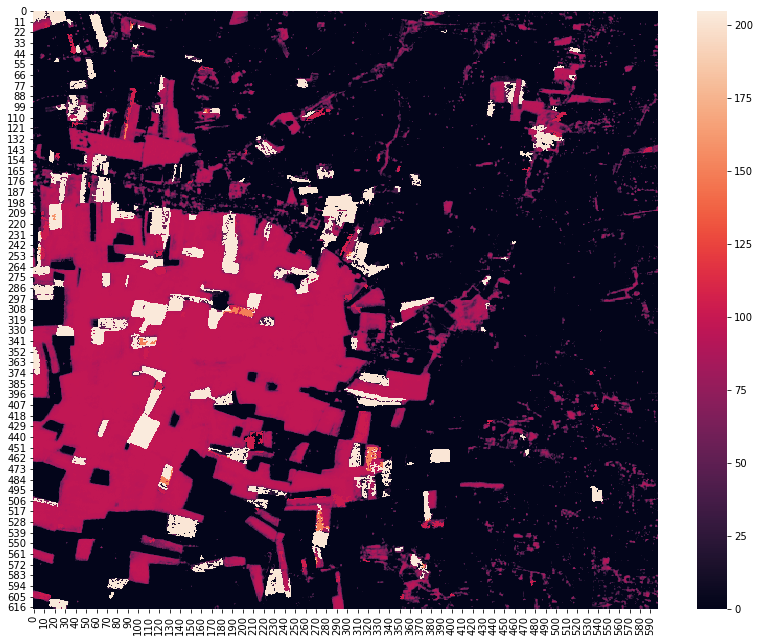

In [15]:
plt.figure(figsize=(14,11))


rotational = np.logical_and(gain2 > 0, loss2 > 0)
med = np.median(fs, axis = 0)
med[gain2 > 0] = (gain2[gain2 > 0] + 100)
med[loss2 > 0] = (loss2[loss2 > 0] + 200)
med[np.logical_and(rotational, gain2 > loss2)] = 150.
med[np.logical_and(rotational, loss2 > gain2)] = 160.
sns.heatmap(med)

In [16]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

movingavg = np.copy(percentiles).reshape((percentiles.shape[0], percentiles.shape[1] * percentiles.shape[2]))
movingavg = np.apply_along_axis(moving_average, 0, movingavg, 9)
movingavg = np.reshape(movingavg, (percentiles.shape[0]-8,percentiles.shape[1], percentiles.shape[2]))

In [17]:
import math
def round_down(x, a):
    return math.floor(x / a) * a

def calc_reference_change(movingavg):
    counterfactuals = []
    for i in range(0, 45, 5):
        baseline = i / 100
        counterfactual = np.mean(movingavg[:3], axis = 0)
        counterfactual = np.logical_and(notree, np.logical_and(counterfactual >= baseline, counterfactual < baseline + 0.05))
        if (i / 100) <= 0.10:
            counterfactual = np.percentile(movingavg[3:, counterfactual], 95)
        elif (i / 100) <= 0.30:
            counterfactual = np.percentile(movingavg[3:, counterfactual], 97.5)
        else:
            counterfactual = np.percentile(movingavg[3:, counterfactual], 97.5)
        #counterfactual = round_down(counterfactual, 0.05)

        change = (counterfactual - baseline)
        change = np.clip(change, 0.2, 0.5)
        reference = counterfactual #- 0.05
        print(i / 100, (counterfactual - (i / 100)))
        #print(f"Target change from {baseline} is {change} to {reference}")
        counterfactuals.append(counterfactual)
    return counterfactuals

def calc_tree_change(movingavg):
    counterfactuals = []
    for i in range(20, 80, 5):
        baseline = i / 100
        counterfactual = np.mean(movingavg[:3], axis = 0)
        counterfactual = np.logical_and(stable, np.logical_and(counterfactual >= baseline, counterfactual < baseline + 0.05))
        counterfactual = np.percentile(movingavg[3:, counterfactual], 2)

        #counterfactual = round_down(counterfactual, 0.05)

        change = (counterfactual - baseline)
        change = np.clip(change, 0.2, 0.5)
        reference = counterfactual #- 0.05
        print(i, i / 100, counterfactual)
        #print(f"Target change from {baseline} is {change} to {reference}")
        counterfactuals.append(counterfactual)
    return counterfactuals

def calc_threshold_for_notree(maxval, cfs_trees):
    maxval = round_down(maxval, 0.05)
    maxval = np.clip(maxval, 0.2, 0.75)
    thresh = cfs_trees[int(maxval // 0.05) - 3]
    return thresh

cfs = calc_reference_change(movingavg)
cfs_trees = calc_tree_change(movingavg)
calc_threshold_for_notree(0.4, cfs_trees)

0.0 0.18333333647913402
0.05 0.21666666318972905
0.1 0.20555554978135557
0.15 0.2500000022972624
0.2 0.25555554910873374
0.25 0.26111110683737526
0.3 0.2222222196559111
0.35 0.23888888359069826
0.4 0.2611111006802982
20 0.2 0.04444444510671827
25 0.25 0.06111111077997419
30 0.3 0.08333333540293905
35 0.35 0.09444444709353977
40 0.4 0.10555555837021934
45 0.45 0.13333333208329148
50 0.5 0.1333333340783914
55 0.55 0.13888889137241575
60 0.6 0.1666666699780358
65 0.65 0.18888888880610466
70 0.7 0.1833333389626609
75 0.75 0.20000000298023224


0.13333333208329148

In [18]:
from scipy.ndimage.filters import minimum_filter1d


def min_filter1d(a, W):
    hW = (W-1)//2 # Half window size
    return minimum_filter1d(a,size=W)#[hW:-hW]


def check_for_gain_subtle(ma):
    
    gain_events = []
    threshes = [0.025, 0.05]
    for thresh in threshes:
        ma_below5 = np.argwhere(ma < thresh).flatten()
        for i in ma_below5:
            if i < (ma.shape[0] - 5) and (i >= 3):
            # check for two in a row at 0.025, and 3 in a row at 0.05
            # This indicates there was no tree before
                numb = 2 if thresh == 0.05 else 1
                if np.sum(ma[i + numb] <= thresh) == numb:
                    # Check for no loss in future
                    # Check for tree in future
                    #print(i, "CANDIDATE")
                    if np.sum(ma[i+2:i+22] < thresh) == 0:
                        previous_tree = (np.sum(ma[:i] > 0.10) >= 3)
                        future_tree = (np.sum(ma[i:] > 0.10) >= 6)
                        #print(previous_tree, future_tree)
                        #print(previous_tree)# >= 3
                        if previous_tree == False and future_tree == True:
                            gain_events.append(i)
    return gain_events


def check_for_gain_large(ma, deforested, reference, counterfactual = cfs):
    
    minimum5win = min_filter1d(ma, 3)
    
    gain_events = []
    # If there is deforestation, the "deforested" no tree pixels
    # Can be above 0.3 in some cases. We know these pixels are no trees
    # So we can adjust the baseline upper limit accordingly
    if deforested:
        deforested_date = np.maximum(np.argmin(ma), 3)
        upper_limit = np.max(ma[deforested_date:deforested_date + 6])
        upper_limit = np.maximum(upper_limit, 0.3)
    else:
        upper_limit = 0.3
        
    # We default to looking for no trees as <0.3, and gain being a 0.2 increase
    if not deforested:
        treethresh = np.clip(reference - 0.05, 0.25, 0.5)# + 0.05
        #counterfactual = np.mean(movingavg[:3], axis = 0)
        baseline = round_down(np.mean(ma[:3]), 0.05)
        baseline = np.clip(baseline, 0.0, 0.40)
        target = counterfactual[int(baseline // 0.05)]
        #print(f"Target change from {baseline} is {target}")
        change = (target - baseline)
        reference = target
    else:
        change = reference - 0.05
        change = np.clip(change, 0.15, 0.35)
        treethresh = reference 
    candidate_notree = (np.argwhere(ma[3:] <= upper_limit).flatten()) + 3
    
    # However, if this does not identify any candidate gain, and the moving averages
    # Go above 0.5, we can extendthe reference to 0.4. This captures missed loss events.
    if (np.max(ma) > 0.5) and (len(candidate_notree) == 0):
        change = 0.3
        reference = 0.4
        candidate_notree = np.argwhere(ma <= upper_limit).flatten()
    #print(candidate_notree)
    for i in candidate_notree:
        if i < (ma.shape[0] - 10) and (i >= 2):
            # Look for 6 dates in a row below reference = stable no-tree
            # And 5 dates in a row above reference = stable tree
            historical_notree = (np.sum(ma[:i+1] >= treethresh)) <= 3
            #print(historical_notree, treethresh)
            if deforested or (i < 6):
                n_lookback = 2 if (i - 2) > 0 else i
            else:
                n_lookback = 5 if (i - 5) > 0 else i
            #print(treethresh)
            if historical_notree:
                current_notree = (np.sum(ma[i-n_lookback:i+1] <= treethresh) == (n_lookback + 1))
            else:
               
                newthresh = calc_threshold_for_notree(np.max(ma[:i+1]), cfs_trees)
                
                #newthresh = np.clip(treethresh - 0.15, 0.1, 0.2)
                #print(newthresh, np.median(ma[:i+1]), np.sum(ma[i-2:i+1]))
                current_notree = (np.sum(ma[i-2:i+1] <= newthresh) == (2 + 1))
                

            current_notree = np.logical_or(current_notree, deforested)
            if current_notree and not deforested:
                baseline = np.mean(ma[:i+1])
                #print("MEAN", baseline)
                baseline = round_down(baseline, 0.05)
                baseline = np.clip(baseline, 0.0, 0.40)
                reference = counterfactual[int(baseline // 0.05)]
                
            elif current_notree:
                baseline = np.mean(ma[i-2:i+1])
                baseline = round_down(baseline, 0.05)
                baseline = np.clip(baseline, 0.0, 0.45)
                reference = counterfactual[int(baseline // 0.05)]
                """
                if not deforested:
                    # Say the noise has gone from 0.3 to 0.05, the reference
                    # Should be at least 0.3 + (0.25 * 5)
                    noise = (np.max(ma[:i]) - np.min(ma[:i+4])) * 0.25
                    noise = np.max(ma[:i]) + noise
                    noise = np.clip(noise, 0, 0.5)
                    reference = np.maximum(reference, noise)
                    #print(reference, noise)
                """
            change = (reference - baseline)
            #print(baseline, reference, change)
            endline = minimum5win[i+1:ma.shape[0]]
            if np.argmax(endline - baseline) == endline.shape[0]:
                endline = ma[-1]

            # Identify whether change threshold is met, and reference is reached
            #print(i, baseline, change, np.max(endline) -baseline, reference)
            if (np.max(endline) - baseline) > change and (np.max(endline) > reference):
                try:
                    gain_date = np.argwhere(np.logical_and(endline >= reference,
                                                           (endline - baseline) > change
                                                          )).flatten()[0] + i
                    imgs_after_gain = ma[gain_date:gain_date + 10]

                    if gain_date < (ma.shape[0] - 4):
                        #print(imgs_after_gain)
                        gain_date_after = np.argwhere(imgs_after_gain > np.percentile(
                                        imgs_after_gain, 75)).flatten()[0] + gain_date
                    else:
                        gain_date_after = gain_date
                    #print(gain_date,i)
                    if gain_date >= i:
                        # Calculate when the reference phenology is achieved
                        if np.percentile(ma[:i], 80) > reference:
                            reference_before = np.percentile(ma[:i], 80)
                        else:
                            reference_before = reference
                        if np.max(ma[i:]) >= reference_before:
                            return_to_reference = np.argwhere(ma[i:] >= reference_before).flatten()[0] + i
                        else:
                            return_to_reference = len(ma)
                        ims_to_return = (return_to_reference - np.argmin(ma[:i]))
                        gain_value = ma[gain_date]

                        min_next_6 = (np.min(ma[gain_date_after:gain_date + 10]))
                        # Basically we assume a tree is 3 observations above 0.20
                        # But if the "reference" tree is much higher, than ~0.20 may be noise.

                        previous_tree = (np.sum(ma[:i] > treethresh) >= 3)
                        previous_tree_diff = np.percentile(ma, 90) < 0.5#(np.max(ma[i:]) - np.max(ma[:i])) < 0.5
                        previous_tree = previous_tree * previous_tree_diff

                        no_loss_after_gain = min_next_6 > (gain_value - 0.05)
                        # If the gain event was not deforested, then it should not "trend"
                        # back down to be no-tree
                        no_loss_after_gain_long = (np.percentile(ma[gain_date_after:], 15)) > (gain_value - 0.05)
                        criteria3 = (np.min(ma[gain_date_after:gain_date_after+16]) / np.max(ma[gain_date_after:gain_date_after+16])) > 0.6
                        criteria2 = (np.percentile(ma[gain_date_after:], 10)) > (np.min(ma[:i]) + 0.10)
                        #print(no_loss_after_gain_long, no_loss_after_gain)
                        no_loss_after_gain_long *= criteria2
                        #no_loss_after_gain_long *= criteria3
                        no_loss_after_gain_long = np.logical_or(deforested, no_loss_after_gain_long)

                        no_loss_after_gain = np.logical_and(no_loss_after_gain, no_loss_after_gain_long)
                        no_loss_after_gain = np.logical_or(deforested, no_loss_after_gain)
                        if (gain_date - 5) > i:
                            no_decrease_until_gain = np.min(np.array(ma[i+5:gain_date])) >= ma[i]

                            no_decrease_until_gain = np.logical_or(no_decrease_until_gain,
                                                                   (np.min(np.array(ma[i:gain_date])) > 0.20))
                        else:
                            no_decrease_until_gain = True
                        # Require no loss for 6 images
                        #print(i, gain_value, ma[i], no_loss_after_gain, no_decrease_until_gain, previous_tree)
                        if no_loss_after_gain and no_decrease_until_gain:
                            #print("u wat")
                            #if deforested == True:# or ((return_to_reference - np.argmin(ma[:i])) > 20):
                            gain_events.append(i)
                            #elif previous_tree == False:
                            #    gain_events.append(i)    
                except:
                    continue
    #if len(gain_events) > 1 and not deforested:
        #print(gain_events)
        #if np.max(np.diff(np.array(gain_events)) > 10):
         #   gain_events = []
    #print(gain_events)
    return gain_events

75
Reference: 0.20000000298023224
0 Large Gain detected: []: False
1 Large Gain detected: []: False
2 Large Gain detected: [3, 4, 5, 34, 35, 36, 37]: True
3 Large Gain detected: []: False
4 Large Gain detected: []: False
5 Large Gain detected: []: False
6 Large Gain detected: []: False
7 Large Gain detected: []: False
8 Large Gain detected: [32, 33, 34, 35, 36, 37]: True
9 Large Gain detected: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37]: False
10 Large Gain detected: [25, 26, 32, 33, 34, 35, 36, 37]: True
11 Large Gain detected: []: False
12 Large Gain detected: [31, 32, 33, 34, 35, 36, 37]: False
13 Large Gain detected: [8, 9, 10, 20, 21, 22, 23, 24, 25, 26, 32, 33, 34, 35, 36, 37]: False
14 Large Gain detected: []: False
15 Large Gain detected: []: False
16 Large Gain detected: [31, 32, 33, 34, 35, 36, 37]: False
17 Large Gain detected: [6, 7, 8, 9, 10, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 36, 37]: False
18 Large Gain detected: []: False
19 Large Gain detected: []: False


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

42 Large Gain detected: [4, 5, 6, 7, 8, 9, 10]: False
43 Large Gain detected: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]: False
44 Large Gain detected: [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]: False
45 Large Gain detected: [36, 37]: False
46 Large Gain detected: []: False
47 Large Gain detected: []: False


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

48 Large Gain detected: [3, 4, 5, 6]: False
49 Large Gain detected: [3, 4, 5, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]: False
50 Large Gain detected: [3, 4, 5, 6, 7, 8, 9, 10, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]: False
51 Large Gain detected: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]: True
52 Large Gain detected: [26, 27, 28, 29, 30, 31, 32]: True


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

53 Large Gain detected: [3, 4, 5, 6, 7, 8, 9, 10, 11, 32, 34]: False
54 Large Gain detected: [20, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]: True
55 Large Gain detected: [31, 32, 33, 34, 35, 36, 37]: True


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

56 Large Gain detected: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]: False
57 Large Gain detected: [18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]: False
58 Large Gain detected: [6, 7, 8, 9, 10]: False
59 Large Gain detected: []: False
60 Large Gain detected: []: False
61 Large Gain detected: [3, 4, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]: True


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

62 Large Gain detected: []: True
63 Large Gain detected: [3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18, 19, 34, 35, 36, 37]: False
64 Large Gain detected: [3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 24, 25, 26, 27, 28]: False
65 Large Gain detected: [3, 4, 5, 6, 7, 8, 9, 10]: False
66 Large Gain detected: [3, 4, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]: False


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

67 Large Gain detected: [3, 4, 5, 6, 7, 8, 9, 10, 34, 35, 36, 37]: True
68 Large Gain detected: []: False
69 Large Gain detected: []: False
70 Large Gain detected: []: True
71 Large Gain detected: [20, 30, 31, 32, 33, 34, 35, 36]: False
72 Large Gain detected: [30, 31, 32, 33, 34, 35, 36, 37]: False
73 Large Gain detected: [3, 4, 5, 6]: False
74 Large Gain detected: [20, 30, 31, 32]: False


/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

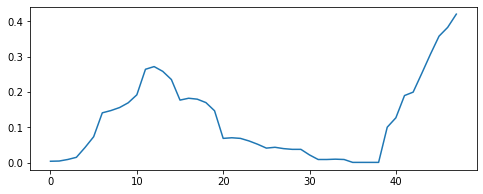

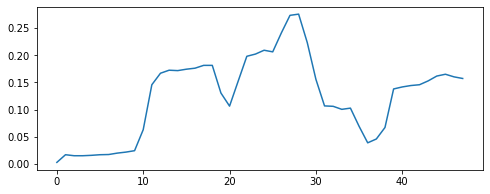

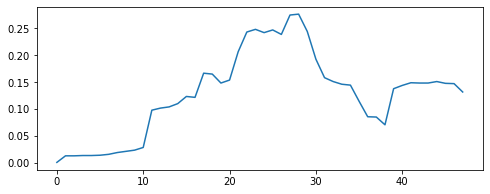

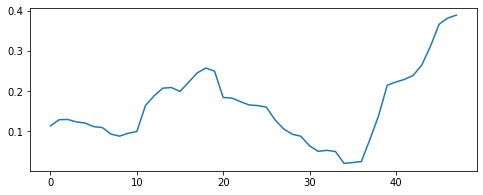

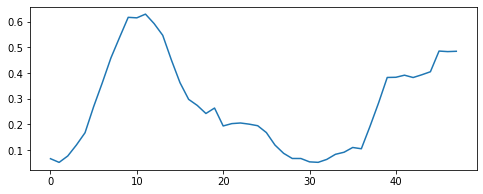

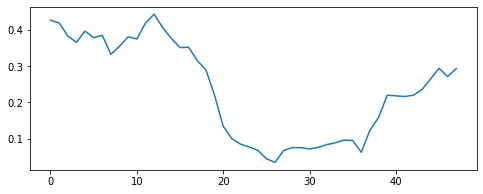

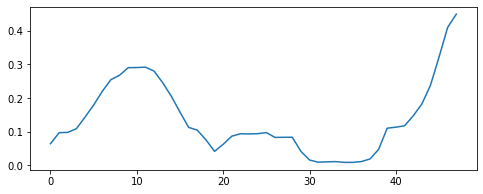

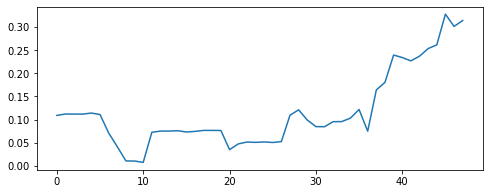

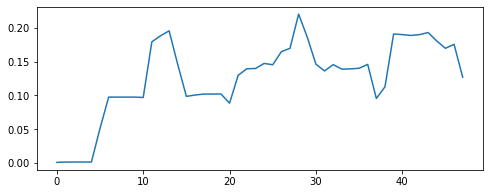

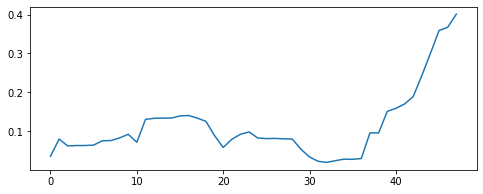

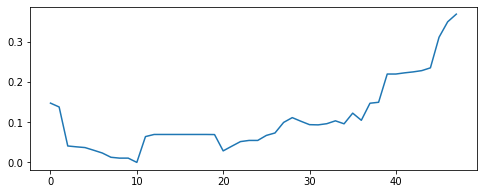

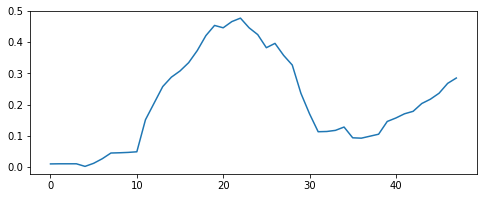

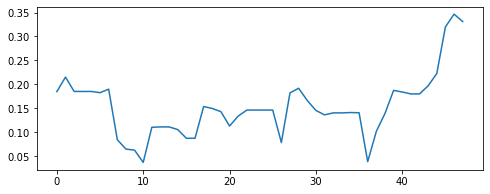

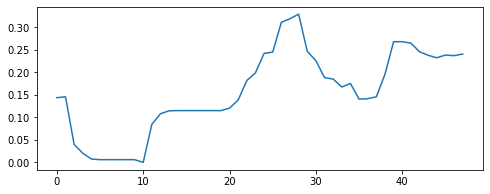

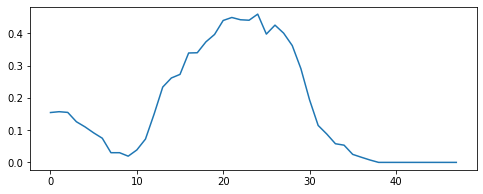

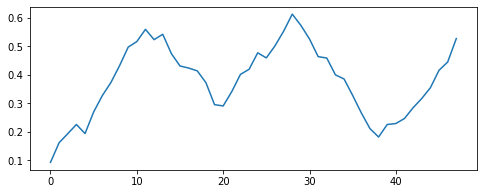

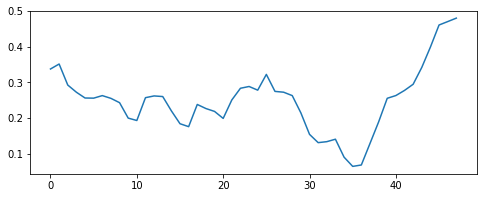

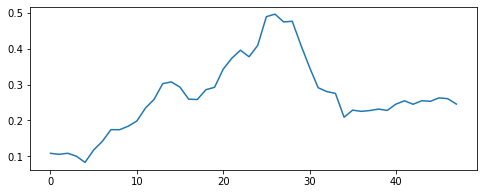

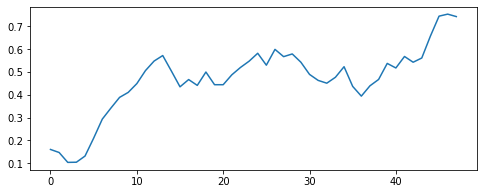

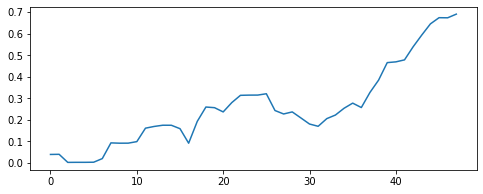

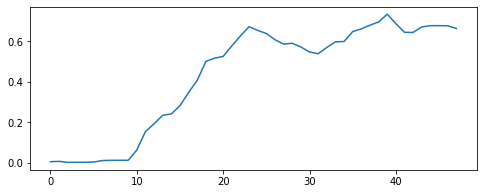

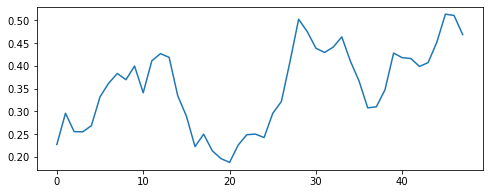

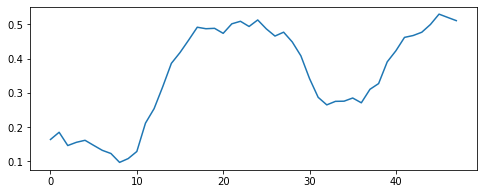

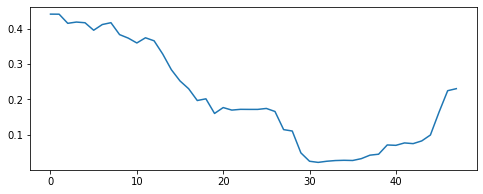

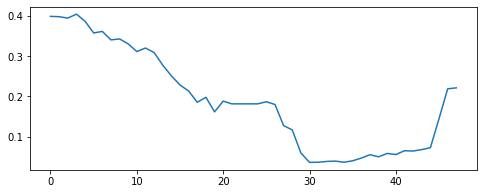

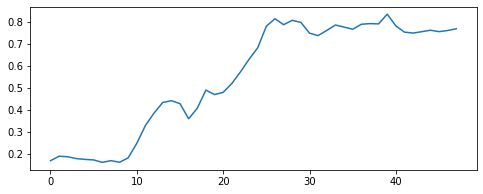

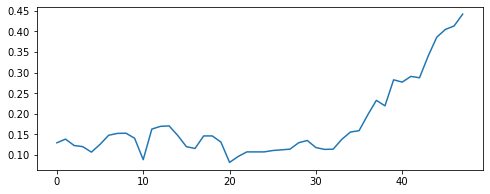

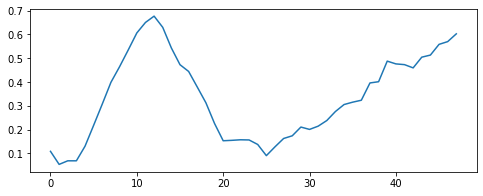

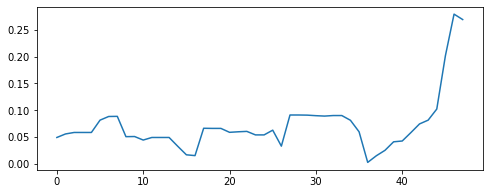

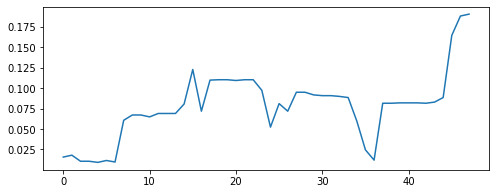

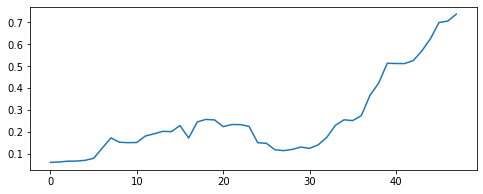

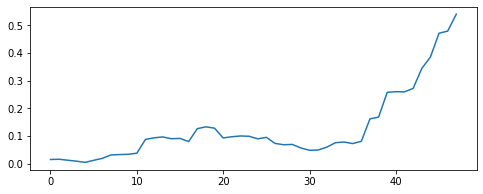

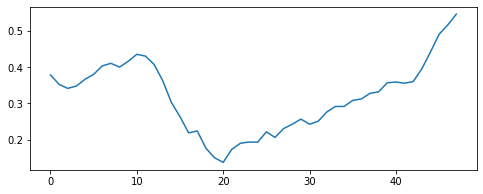

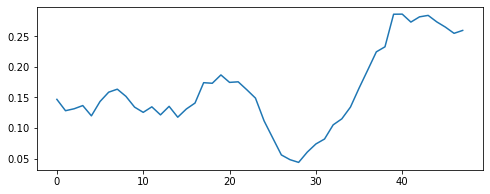

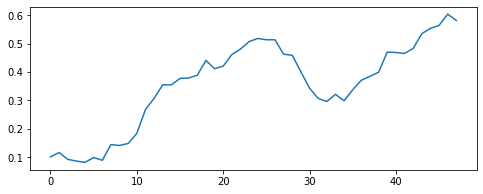

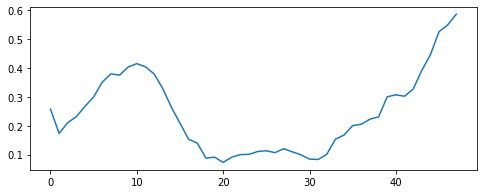

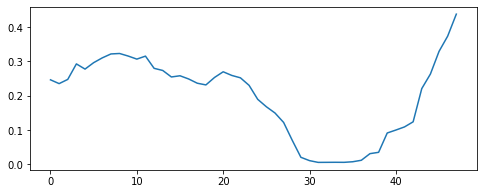

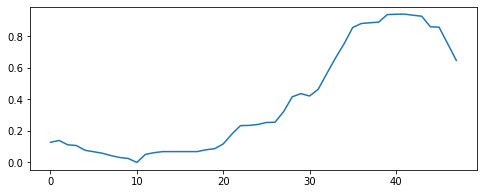

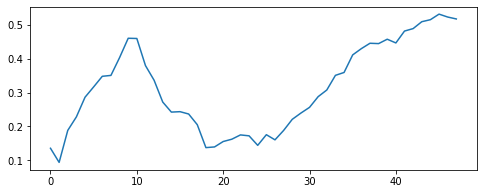

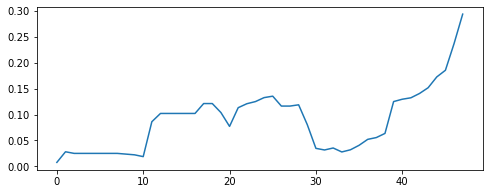

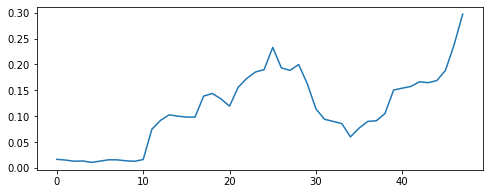

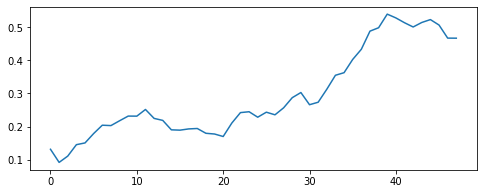

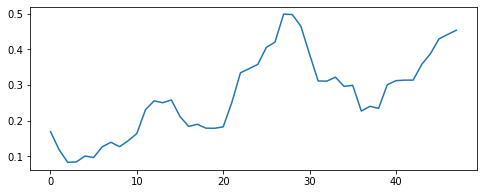

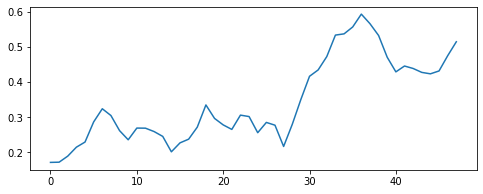

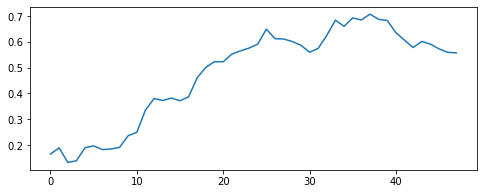

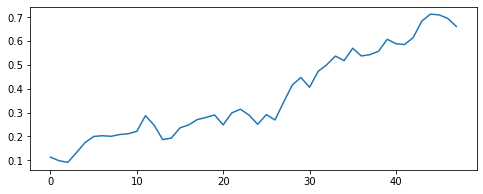

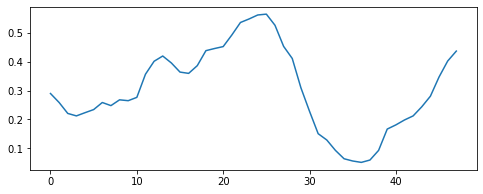

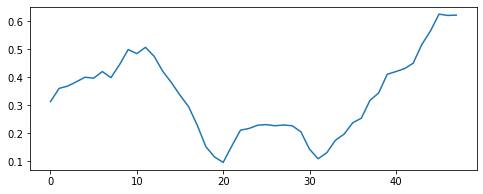

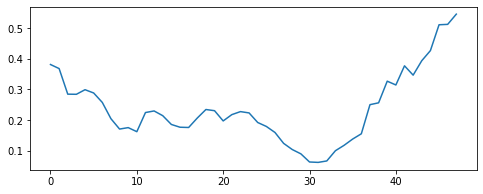

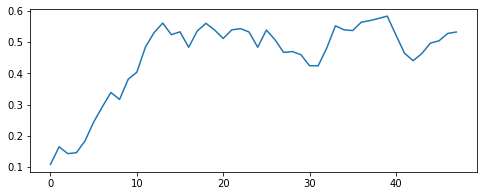

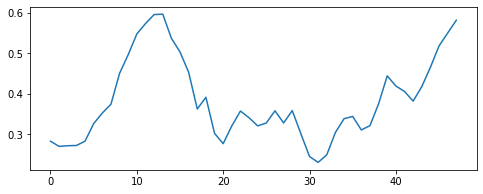

In [19]:
gain2 = remove_noise(gain2, 10)
Zlabeled,Nlabels = ndimage.measurements.label(gain2)
print(Nlabels)
#label_size = np.array([(Zlabeled == label).sum() for label in range(Nlabels + 1)])
#print(np.mean(gain2[Zlabeled == 20]))

reference = np.percentile(percentiles[:, notree], 90)
reference = np.clip(reference, 0.20, 0.40)
print(f"Reference: {reference}")

gainpx = []
for idx in range(Nlabels):
    #print(idx)
    means = np.mean(percentiles[:, Zlabeled == idx], axis = 1)
    patch = percentiles[:, Zlabeled == idx]
    deforested = np.mean(loss2[Zlabeled == idx] > 0) > 0.10
    ma = moving_average(means, n = 9)
    gain_events = check_for_gain_subtle(ma)
    
    large_gain = check_for_gain_large(ma, deforested, reference)
    #print("GAIN", large_gain)
    if  len(gain_events) == 0 and len(large_gain) == 0:# and
        print(f"{idx} Large Gain detected: {large_gain}: {deforested}")
        #print(f"{idx} Gain detected: {gain_events}")
        #plt.figure(figsize=(8,3))
        #g = sns.lineplot(x = np.arange(0, len(dates) - 8), y = ma)
        #g.set(ylim = (0, 1))# < 0.05)
        continue
    else:
        print(f"{idx} Large Gain detected: {large_gain}: {deforested}")
        #print(f"{idx} Gain detected: {gain_events}")
        plt.figure(figsize=(8,3))
        g = sns.lineplot(x = np.arange(0, len(dates) - 8), y = ma)
        #g.set(ylim = (0, 1))# < 0.05)
        gainpx.append(idx)

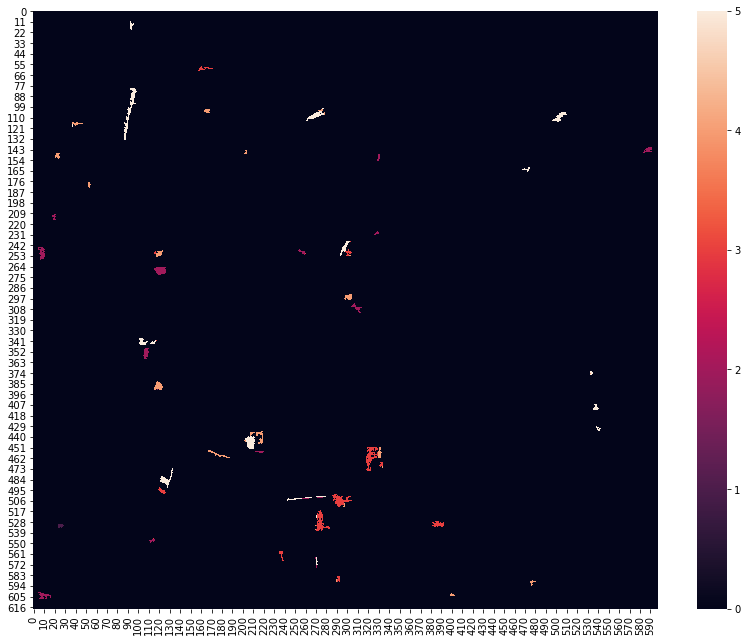

In [20]:
plt.figure(figsize=(14,11))
sns.heatmap((gain2 * np.isin(Zlabeled, gainpx)))
#sns.heatmap(np.logical_and(Zlabeled > 150, Zlabeled < 200) )#* ~np.isin(Zlabeled, gainpx))

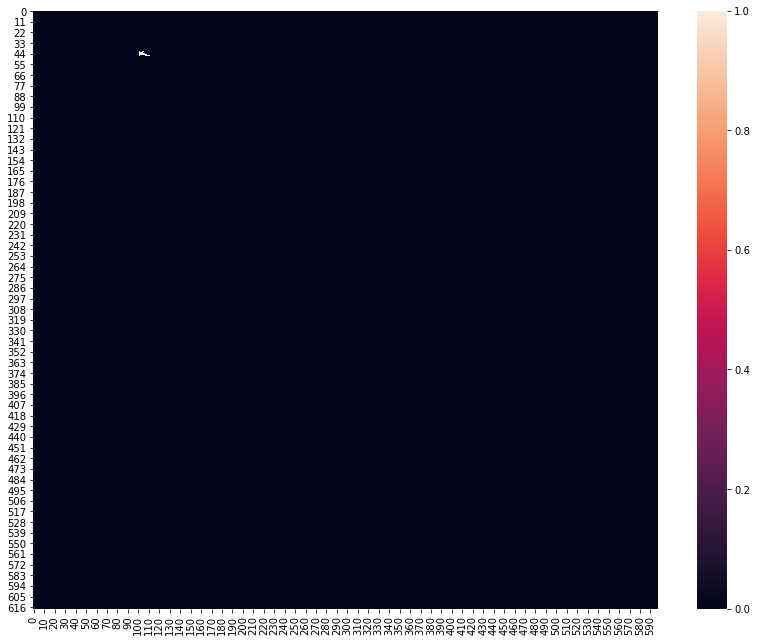

In [21]:
plt.figure(figsize=(14,11))
#sns.heatmap((gain2 * ~np.isin(Zlabeled,gainpx)))
sns.heatmap(np.logical_and(Zlabeled >= 5, Zlabeled < 6) )#* ~np.isin(Zlabeled, gainpx))

In [22]:
"""
gain3 = np.copy(gain)

for i in range(gain3.shape[0]):
    gainpx_event = []
    gain3label,Nlabels = ndimage.measurements.label(gain3[i])
    for idx in range(Nlabels):
        means = np.mean(percentiles[:, gain3label == idx], axis = 1)
        patch = percentiles[:, gain3label == idx]
        deforested = np.mean(loss2[gain3label == idx] > 0) > 0.10
        ma = moving_average(means, n = 9)
        gain_events = check_for_gain_subtle(ma)
        large_gain = check_for_gain_large(ma, deforested)
        if  len(gain_events) == 0 and len(large_gain) == 0:# and
            continue
        else:
            #print(f"{idx} Large Gain detected: {large_gain}: {deforested}")
            #print(f"{idx} Gain detected: {gain_events}")
            #plt.figure(figsize=(14,5))
            #sns.lineplot(x = np.arange(0, len(dates) - 8), y = ma)# < 0.05)
            gainpx_event.append(idx)
    print(Nlabels, len(gainpx_event))
    gain3[i, ~np.isin(gain3label, gainpx_event)] = 0.
        
plt.figure(figsize=(14,11))
sns.heatmap((gain3[4]))
#sns.heatmap(np.logical_and(Zlabeled > 63, Zlabeled < 65))
"""

'\ngain3 = np.copy(gain)\n\nfor i in range(gain3.shape[0]):\n    gainpx_event = []\n    gain3label,Nlabels = ndimage.measurements.label(gain3[i])\n    for idx in range(Nlabels):\n        means = np.mean(percentiles[:, gain3label == idx], axis = 1)\n        patch = percentiles[:, gain3label == idx]\n        deforested = np.mean(loss2[gain3label == idx] > 0) > 0.10\n        ma = moving_average(means, n = 9)\n        gain_events = check_for_gain_subtle(ma)\n        large_gain = check_for_gain_large(ma, deforested)\n        if  len(gain_events) == 0 and len(large_gain) == 0:# and\n            continue\n        else:\n            #print(f"{idx} Large Gain detected: {large_gain}: {deforested}")\n            #print(f"{idx} Gain detected: {gain_events}")\n            #plt.figure(figsize=(14,5))\n            #sns.lineplot(x = np.arange(0, len(dates) - 8), y = ma)# < 0.05)\n            gainpx_event.append(idx)\n    print(Nlabels, len(gainpx_event))\n    gain3[i, ~np.isin(gain3label, gainpx_event

In [23]:
gain3 = np.copy(gain2)

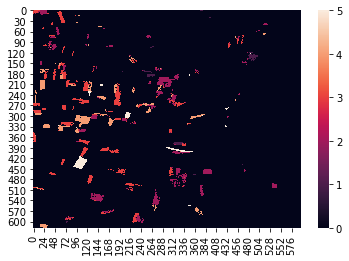

In [24]:
sns.heatmap(loss2)

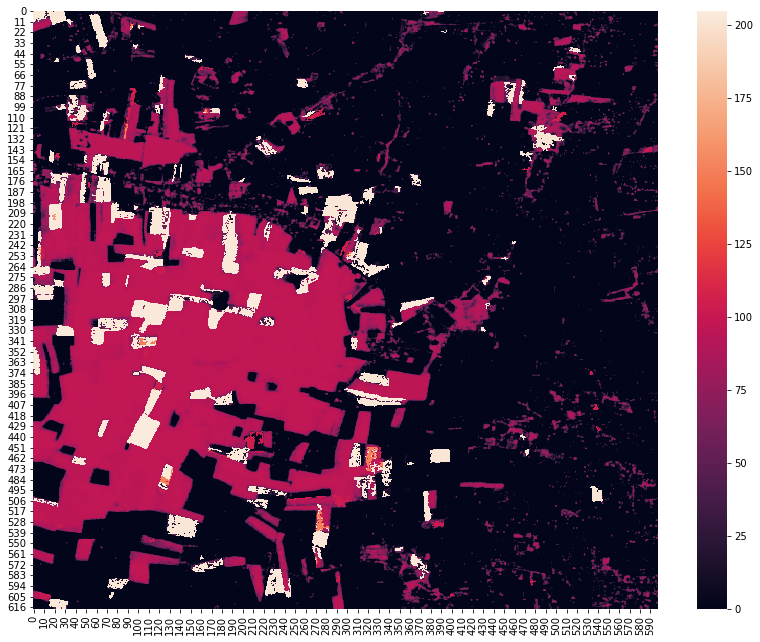

In [25]:
gain2[~np.isin(Zlabeled, gainpx)] = 0.
plt.figure(figsize=(14,11))
rotational = np.logical_and(gain2 > 0, loss2 > 0)
med = np.median(fs, axis = 0)
med[gain2 > 0] = (gain2[gain2 > 0] + 100)
med[loss2 > 0] = (loss2[loss2 > 0] + 200)
med[np.logical_and(rotational, gain2 > loss2)] = 150.
med[np.logical_and(rotational, loss2 > gain2)] = 160.
sns.heatmap(med)

In [29]:
bbx = [-1.3333777777777778, 7.111122222222222, -1.2778222222222224, 7.166677777777777] #Ghana
bbx = [-39.88887777777778, -17.666677777777778, -39.83332222222222, -17.61112222222222] # Brazil
bbx = [102.60442222222223, 14.50002222222222, 102.65997777777777, 14.555577777777778] # thailandd
#bbx = [33.94442222222222, -10.888877777777779, 33.99997777777778, -10.833322222222222] # malawi
#bbx = [83.10272222222223, 19.11112222222222, 83.15827777777777, 19.166677777777778] #inddia
#bbx = [-5.888877777777778, 6.444422222222222, -5.833322222222223, 6.499977777777778] # IVORY
#bbx = [14.388922222222222, 4.500022222222222, 14.444477777777779, 4.555577777777778] # cameroon
#bbx = [7.111122222222222, 5.111122222222222, 7.166677777777777, 5.166677777777777] # Nigeria
#bbx = [105.43802222222223, 19.833322222222222, 105.49357777777777, 19.88887777777778] # Vietnam
#bbx = [35.88892222222222, -7.999977777777778, 35.94447777777778, -7.944422222222222] # Tanzania
#bbx = [83.21392222222222, 19.166622222222223, 83.26947777777777, 19.22217777777778] # 5578, 1242
#bbx = [95.65942222222223, 17.72222222222222, 95.71497777777778, 17.77777777777778] # myanmar
def write_tif(arr: np.ndarray,
              point: list,
              x: int,
              y: int,
              out_folder: str,
              suffix="_FINAL") -> str:
    #! TODO: Documentation

    file = out_folder + f"{str(x)}X{str(y)}Y{suffix}.tif"

    west, east = point[0], point[2]
    north, south = point[3], point[1]
    arr[np.isnan(arr)] = 255
    arr = arr.astype(np.int16)

    transform = rs.transform.from_bounds(west=west,
                                               south=south,
                                               east=east,
                                               north=north,
                                               width=arr.shape[1],
                                               height=arr.shape[0])

    print("Writing", file)
    new_dataset = rs.open(file,
                                'w',
                                driver='GTiff',
                                height=arr.shape[0],
                                width=arr.shape[1],
                                count=1,
                                dtype="int16",
                                compress='lzw',
                                crs='+proj=longlat +datum=WGS84 +no_defs',
                                transform=transform)
    new_dataset.write(arr, 1)
    new_dataset.close()
    return file

write_tif(med, bbx, x, y, 'change/', suffix = 'CHANGENEW_MA13')

Writing change/5927X1158YCHANGENEW_MA13.tif


'change/5927X1158YCHANGENEW_MA13.tif'

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

[Text(0, 0.5, 'Anomaly probility')]

<Figure size 1080x576 with 0 Axes>

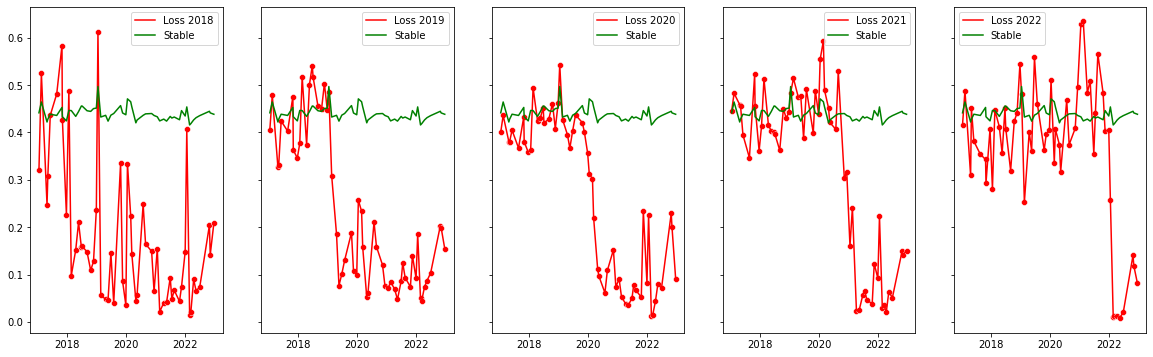

In [27]:
mean_loss18 = np.mean(percentiles[:, loss2 == 1], axis = (1))
mean_loss19 = np.mean(percentiles[:, loss2 == 2], axis = (1))
mean_loss20 = np.mean(percentiles[:, loss2 == 3], axis = (1))
mean_loss21 = np.mean(percentiles[:, loss2 == 4], axis = (1))
mean_loss22 = np.mean(percentiles[:, loss2 == 5], axis = (1))
mean_nochange_tree = np.mean(percentiles[:, np.logical_and(changemap <= 100, changemap > 40)], axis = (1))


plt.figure(figsize=(15,8))
fig, axs = plt.subplots(ncols=5, figsize = (20, 6), sharey = True)
sns.scatterplot((dates / 365) + 2017, mean_loss18, color = 'red', ax = axs[0])
sns.lineplot((dates / 365) + 2017, mean_loss18, color = 'red', label = 'Loss 2018', ax = axs[0])
sns.scatterplot((dates / 365) + 2017, mean_loss19, color = 'red', ax = axs[1])
sns.lineplot((dates / 365) + 2017, mean_loss19, color = 'red', label = 'Loss 2019', ax = axs[1])
sns.scatterplot((dates / 365) + 2017, mean_loss20, color = 'red', ax = axs[2])
sns.lineplot((dates / 365) + 2017, mean_loss20, color = 'red', label = 'Loss 2020', ax = axs[2])
sns.scatterplot((dates / 365) + 2017, mean_loss21, color = 'red', ax = axs[3])
sns.lineplot((dates / 365) + 2017, mean_loss21, color = 'red', label = 'Loss 2021', ax = axs[3])
sns.scatterplot((dates / 365) + 2017, mean_loss22, color = 'red', ax = axs[4])
sns.lineplot((dates / 365) + 2017, mean_loss22, color = 'red', label = 'Loss 2022', ax = axs[4])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[0])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[1])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[2])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[3])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[4])

#g.set(ylim=(0, 1))
g.set(ylabel = 'Anomaly probility')

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

[Text(0, 0.5, 'Anomaly probility')]

<Figure size 1080x576 with 0 Axes>

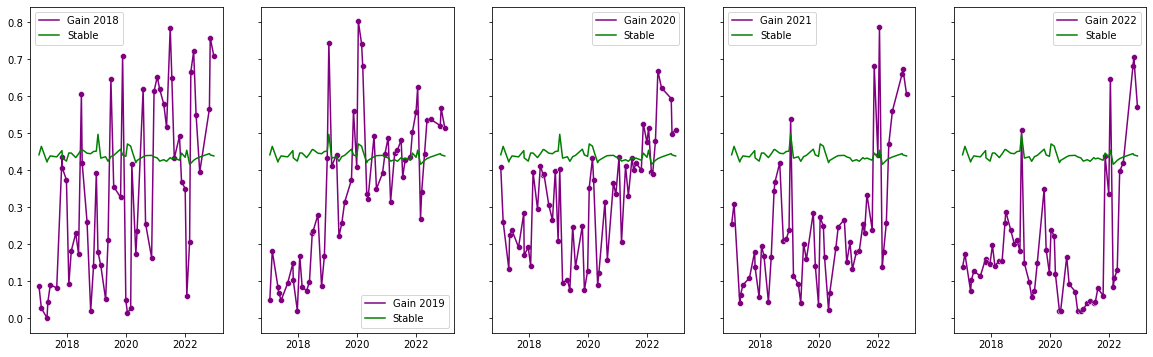

In [28]:
mean_loss18 = np.mean(percentiles[:, gain2 == 1], axis = (1))
mean_loss19 = np.mean(percentiles[:, gain2 == 2], axis = (1))
mean_loss20 = np.mean(percentiles[:, gain2 == 3], axis = (1))
#mean_loss20 = percentiles[:, gain2 == 3][:, 25]
mean_loss21 = np.mean(percentiles[:, gain2 == 4], axis = (1))
mean_loss22 = np.mean(percentiles[:, gain2 == 5], axis = (1))
mean_nochange_tree = np.mean(percentiles[:, np.logical_and(changemap <= 100, changemap > 40)], axis = (1))


plt.figure(figsize=(15,8))
fig, axs = plt.subplots(ncols=5, figsize = (20, 6), sharey = True)
#sns.scatterplot((dates / 365) + 2017, 1 - mean_loss, color = 'red')
#sns.lineplot((dates / 365) + 2017, 1 - mean_loss, color = 'red', label = 'Loss')
sns.scatterplot((dates / 365) + 2017, mean_loss18, color = 'purple', ax = axs[0])
sns.lineplot((dates / 365) + 2017, mean_loss18, color = 'purple', label = 'Gain 2018', ax = axs[0])
sns.scatterplot((dates / 365) + 2017, mean_loss19, color = 'purple', ax = axs[1])
sns.lineplot((dates / 365) + 2017, mean_loss19, color = 'purple', label = 'Gain 2019', ax = axs[1])
sns.scatterplot((dates / 365) + 2017, mean_loss20, color = 'purple', ax = axs[2])
sns.lineplot((dates / 365) + 2017, mean_loss20, color = 'purple', label = 'Gain 2020', ax = axs[2])
sns.scatterplot((dates / 365) + 2017, mean_loss21, color = 'purple', ax = axs[3])
sns.lineplot((dates / 365) + 2017, mean_loss21, color = 'purple', label = 'Gain 2021', ax = axs[3])
sns.scatterplot((dates / 365) + 2017, mean_loss22, color = 'purple', ax = axs[4])
sns.lineplot((dates / 365) + 2017, mean_loss22, color = 'purple', label = 'Gain 2022', ax = axs[4])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[0])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[1])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[2])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[3])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[4])

#g.set(ylim=(0, 1))
g.set(ylabel = 'Anomaly probility')

##### mean_rot = np.mean(percentiles[:, med == 150], axis = (1))
mean_rot2 = np.mean(percentiles[:, med == 160], axis = (1))
mean_nochange_tree = np.mean(percentiles[:, np.logical_and(changemap <= 100, changemap > 40)], axis = (1))

fig, axs = plt.subplots(ncols=2, figsize = (20, 6), sharey = True)
#sns.scatterplot((dates / 365) + 2017, 1 - mean_loss, color = 'red')
#sns.lineplot((dates / 365) + 2017, 1 - mean_loss, color = 'red', label = 'Loss')
sns.scatterplot((dates / 365) + 2017, mean_rot, color = 'orange', ax = axs[0])
sns.lineplot((dates / 365) + 2017, mean_rot, color = 'orange', label = 'Rotation - loss, gain', ax = axs[0])
sns.scatterplot((dates / 365) + 2017, mean_rot2, color = 'blue', ax = axs[1])
sns.lineplot((dates / 365) + 2017, mean_rot2, color = 'blue', label = 'Rotation - gain, loss', ax = axs[1])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[0])
g = sns.lineplot((dates / 365) + 2017, mean_nochange_tree, color = 'green', label = 'Stable', ax = axs[1])

#g.set(ylim=(0, 1))
g.set(ylabel = 'Anomaly probility')

#### 